In [1]:
"""
@author: Iñigo
"""

'\n@author: Iñigo\n'

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from cycler import cycler
import yaml

In [59]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
# typical one column figure width
cm=1/2.54

In [4]:
# load style

plt.style.use('./pv-textbook_inigo.mplstyle')

In [12]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


In [13]:
am15_spectra=pd.read_excel('./data/astmg173.xls', sheet_name='SMARTS2')
am15g=(np.array(am15_spectra['Wvlgth nm']), np.array(am15_spectra['Global tilt W*m-2*nm-1']))

In [52]:
def used_factor(x, bg_low, bg_high):
    ener=1240/x
    if ener<bg_low or ener>bg_high:
        return 0
    return (bg_low/ener)

bg1 = 1
bg2 = 1.4
bg3 = 1.9

used1 = []
used2 = []
used3 = []

for energy in am15g[0]:
    used1.append(used_factor(energy, bg1, bg2))
    used2.append(used_factor(energy, bg2, bg3))
    used3.append(used_factor(energy, bg3, 10))

/tmp/ipykernel_5291/3206280864.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return 1240/x


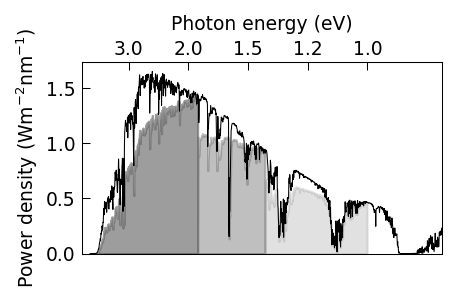

In [63]:
fig = plt.figure(figsize=(8*cm, 5*cm), dpi=DPI_PLOT)
ax = fig.add_subplot(111)

lw = 0.5
all_data = am15g[1]
used_data1 = all_data * used1
used_data2 = all_data * used2
used_data3 = all_data * used3

ax.plot(am15g[0], all_data, c='black', lw=lw)
#ax.plot(am15g[0], used_data1, c=colors['color13'], lw=lw, alpha=1)
#ax.plot(am15g[0], used_data2, c=colors['color13'], lw=lw, alpha=1)
#ax.plot(am15g[0], used_data3, c=colors['color13'], lw=lw, alpha=1)

ax.fill_between(am15g[0], used_data1, color=colors['color13'], alpha=0.195, where=am15g[0]<1240/bg1)
ax.fill_between(am15g[0], used_data2, color=colors['color13'], alpha=0.425, where=am15g[0]<1240/bg2)
ax.fill_between(am15g[0], used_data3, color=colors['color13'], alpha=0.65, where=am15g[0]<1240/bg3)

ax.set_ylabel(r'Power density (Wm$^{-2}$nm$^{-1}$)')
ax.set_ylim([0, None])
ax.set_xlim([250, 1500])
ax.set_xticks([])
ax.tick_params(which='both', top=False, right=False, bottom=False)

def nm2eV(x):
    return 1240/x

def eV2nm(x):
    return nm2eV(x)

secax = ax.secondary_xaxis('top', functions=(nm2eV, eV2nm))

secax.set_xticks(np.array([1, 1.2, 1.5, 2, 3]))
secax.set_xlabel('Photon energy (eV)', labelpad=5)
secax.tick_params('x', pad=1.5)

plt.tight_layout()

#plt.savefig ('./spectrum_MJSC.png', dpi=DPI_SAVE)